# Training Neural Net on supplemented dataset

## Outcome

In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

%load_ext autoreload
%autoreload 2

%load_ext version_information
%version_information numpy, scipy, matplotlib, pandas

Software versions
Python 2.7.12 64bit [GCC 5.4.0 20160609]
IPython 5.4.1
OS Linux 4.10.0 28 generic x86_64 with Ubuntu 16.04 xenial
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
pandas 0.20.3
Tue Aug 01 13:41:17 2017 AEST

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cv2
import glob
import copy
import random
import pandas as pd

import os
import sys

sys.path.append("../src")
from images_permute import processing_pipeline

np.random.seed(0)

def view(image):
    plt.figure()
    plt.axis('off')
    plt.imshow(image, cmap = cm.Greys_r)

## Split Data
- Main directory contains most of the images from the training dataset
- Increase directory includes a subset of the training data that my model had trouble with and I want to supplement

In [3]:
list_image_directory_paths = glob.glob('/home/jack/Data/main/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/home/jack/Data/main/Queen/', 60)


In [4]:
class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        class_images_dict[image_class_name].append(image)

('Queen', '/home/jack/Data/main/Queen/')
('TT', '/home/jack/Data/main/TT/')
('Trident', '/home/jack/Data/main/Trident/')
('Hash', '/home/jack/Data/main/Hash/')
('Leaf', '/home/jack/Data/main/Leaf/')
('5', '/home/jack/Data/main/5/')
('CircleHalf', '/home/jack/Data/main/CircleHalf/')
('Unknown', '/home/jack/Data/main/Unknown/')
('e', '/home/jack/Data/main/e/')
('Power', '/home/jack/Data/main/Power/')
('Peace', '/home/jack/Data/main/Peace/')
('1', '/home/jack/Data/main/1/')
('EE', '/home/jack/Data/main/EE/')
('Pillars', '/home/jack/Data/main/Pillars/')
('ZZ', '/home/jack/Data/main/ZZ/')
('Sun', '/home/jack/Data/main/Sun/')
('h', '/home/jack/Data/main/h/')
('Note1', '/home/jack/Data/main/Note1/')
('Plane', '/home/jack/Data/main/Plane/')
('Asterisk', '/home/jack/Data/main/Asterisk/')
('Umbrella', '/home/jack/Data/main/Umbrella/')
('a', '/home/jack/Data/main/a/')
('RR', '/home/jack/Data/main/RR/')
('ArrowHollow', '/home/jack/Data/main/ArrowHollow/')
('6', '/home/jack/Data/main/6/')
('Ankh', 

In [5]:
len(class_images_dict['AA'])

5694

In [6]:
list_image_directory_paths = glob.glob('/home/jack/Data/increase/*/')
print(list_image_directory_paths[0], len(list_image_directory_paths))

('/home/jack/Data/increase/TT/', 58)


In [7]:
increase_class_images_dict = {}
for image_directory_path in list_image_directory_paths:
    image_class_name = os.path.basename(os.path.normpath(image_directory_path))
    print(image_class_name, image_directory_path)
    increase_class_images_dict[image_class_name] = []
    
    for image_file in glob.glob(image_directory_path + '*.png'):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        increase_class_images_dict[image_class_name].append(image)

('TT', '/home/jack/Data/increase/TT/')
('Trident', '/home/jack/Data/increase/Trident/')
('Hash', '/home/jack/Data/increase/Hash/')
('Leaf', '/home/jack/Data/increase/Leaf/')
('5', '/home/jack/Data/increase/5/')
('CircleHalf', '/home/jack/Data/increase/CircleHalf/')
('e', '/home/jack/Data/increase/e/')
('Power', '/home/jack/Data/increase/Power/')
('Peace', '/home/jack/Data/increase/Peace/')
('1', '/home/jack/Data/increase/1/')
('EE', '/home/jack/Data/increase/EE/')
('Pillars', '/home/jack/Data/increase/Pillars/')
('ZZ', '/home/jack/Data/increase/ZZ/')
('Sun', '/home/jack/Data/increase/Sun/')
('h', '/home/jack/Data/increase/h/')
('Note1', '/home/jack/Data/increase/Note1/')
('Plane', '/home/jack/Data/increase/Plane/')
('Asterisk', '/home/jack/Data/increase/Asterisk/')
('Umbrella', '/home/jack/Data/increase/Umbrella/')
('a', '/home/jack/Data/increase/a/')
('RR', '/home/jack/Data/increase/RR/')
('ArrowHollow', '/home/jack/Data/increase/ArrowHollow/')
('6', '/home/jack/Data/increase/6/')
('A

In [8]:
len(increase_class_images_dict['AA'])

2440

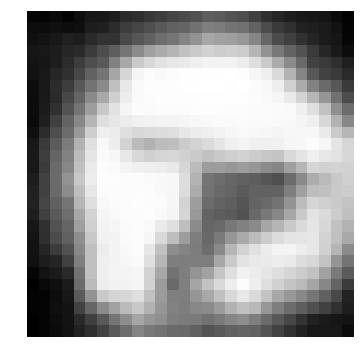

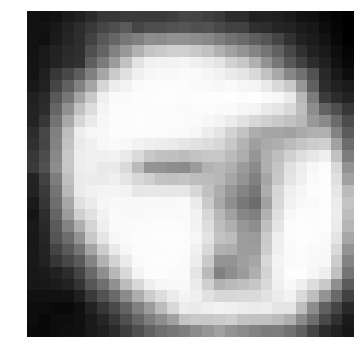

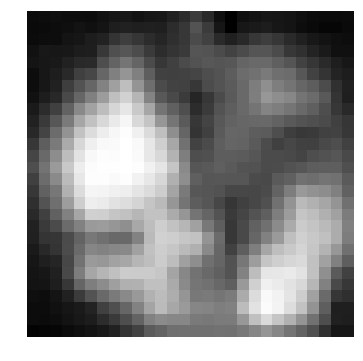

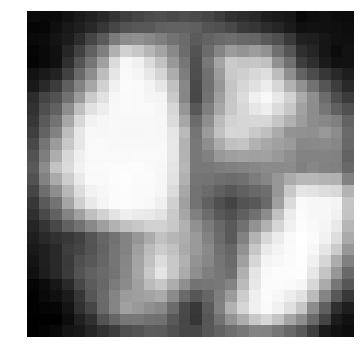

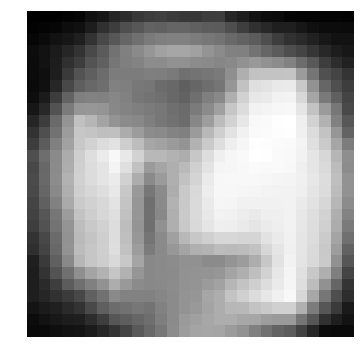

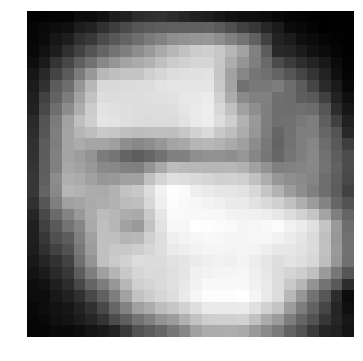

In [9]:
for i in range(2):
    view(class_images_dict['AA'][i])

for i in range(2):
    view(class_images_dict['KK'][i])
    
for i in range(2):
    view(class_images_dict['2'][i])

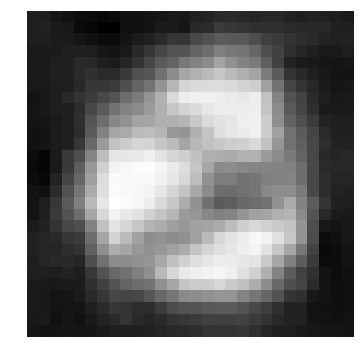

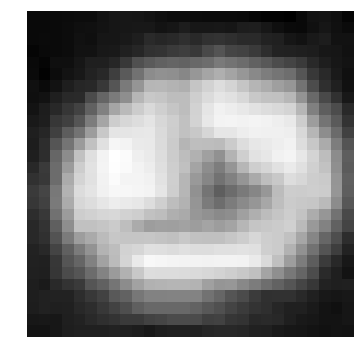

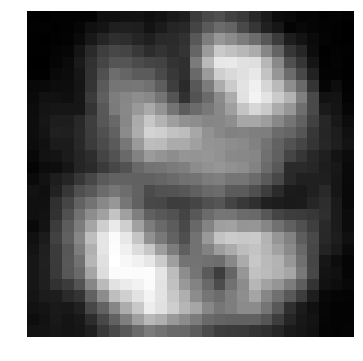

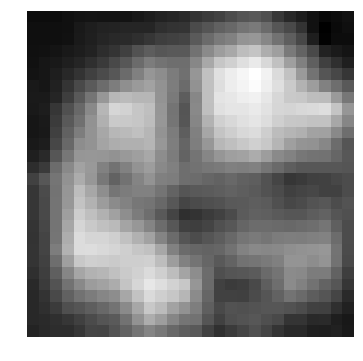

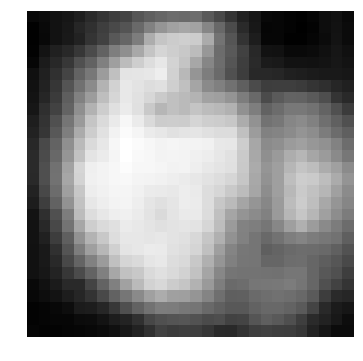

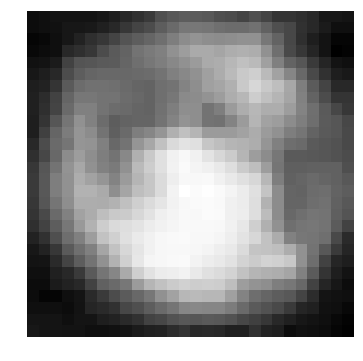

In [10]:
for i in range(2):
    view(increase_class_images_dict['AA'][i])

for i in range(2):
    view(increase_class_images_dict['KK'][i])
    
for i in range(2):
    view(increase_class_images_dict['2'][i])

In [11]:
num_images_by_class = {'class': [], 'num_main': [], 'num_increase': []}

for k in class_images_dict.keys():
    num_images_by_class['class'].append(k)
    num_images_by_class['num_main'].append(len(class_images_dict[k]))
    if k in increase_class_images_dict.keys():
        num_images_by_class['num_increase'].append(len(increase_class_images_dict[k]))
    else:
        num_images_by_class['num_increase'].append(0)
    
pd.DataFrame(num_images_by_class)

,class,num_increase,num_main
0,CircleLine,2007,19933
1,Leaf,1998,8554
2,Note1,1121,9498
3,Unknown,0,45665
4,DD,2768,15757
5,Peace,1120,17954
6,Question,1261,10374
7,Pillars,1152,44860
8,HH,1104,9195
9,Ampersand,68,47339


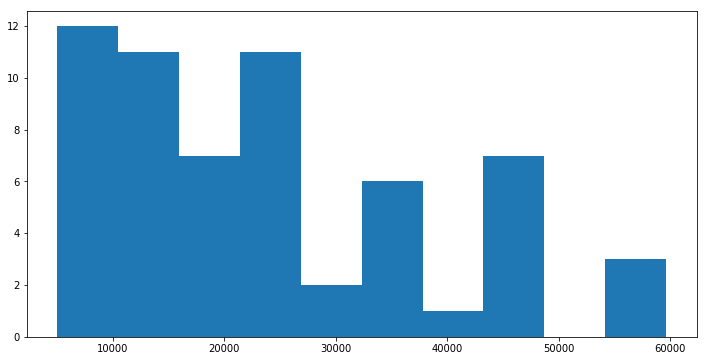

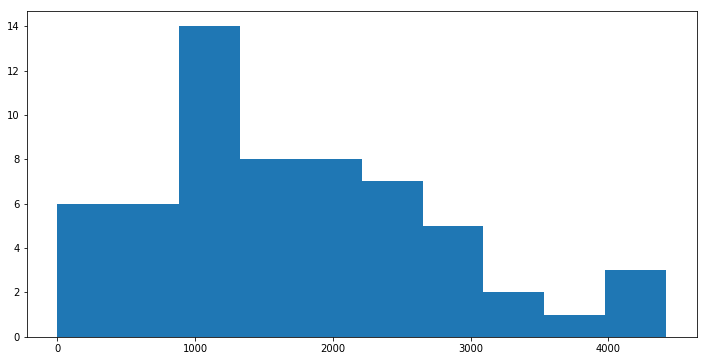

In [12]:
plt.figure()
plt.hist(num_images_by_class['num_main'])
plt.show()

plt.figure()
plt.hist(num_images_by_class['num_increase'])
plt.show()

## Upsampling Classes
I've decided to increase the number and variation of different classes depending on how many training samples I have. I'm aiming for each group to end up with ~90-120k images per class.
- 45k+   x 2
- 30-45k x 3
- 20-30k x 5
- 15-20k x 7
- 10-15k x 10
- <10k   x 18

In [13]:
def norm_image(image):
    image[image < 0] = 0
    image[image > 255] = 255
    return np.uint8(image)

def add_noise(image, n_or_u):
    noise = np.zeros((28,28), np.uint8)
    if n_or_u == 'n':
        cv2.randn(noise, 30, 2)
    else:
        cv2.randu(noise, 20, 2)
    noisy_image = np.uint32(image) + noise
    noisy_image[noisy_image < 0] = 0
    noisy_image[noisy_image > 255] = 255
    noisy_image = np.uint8(noisy_image)
    return noisy_image

def rotate_image(image, degrees):
    rotated_images = []
    for angle in range(degrees, 360, degrees):
        M = cv2.getRotationMatrix2D((14,14),angle,1)
        r = cv2.warpAffine(image,M,(28,28))
        rotated_images.append(r)
    return rotated_images

def change_brightness(image):
    image_int32 = np.int32(image)
    increase_brightness = norm_image(image_int32 + 80)
    decrease_brightness = norm_image(image_int32 - 80)
    return [increase_brightness, decrease_brightness]

def change_contrast(image):
    image_int32 = np.int32(image)
    increase_contrast = norm_image(image_int32 * 1.4)
    decrease_contrast = norm_image(image_int32 * 0.4)
    return [increase_contrast, decrease_contrast]
    
def occlude_edges(image):
    full_size = np.zeros((28, 28), dtype=np.uint8)
    full_size[2:26, 2:26] = image[2:26, 2:26]
    return full_size

def mean_smooth(image):
    mean_smoothed = cv2.blur(image, (3, 3))
    return mean_smoothed

In [45]:
def gen_2_images(image):
    new_images = [image]
    new_images.append(rotate_image(image, 140)[0])
    new_images[1] = norm_image(np.int32(new_images[1]) - 80)
    
    return new_images

def gen_3_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 140))
    new_images[1] = norm_image(np.int32(new_images[1]) + 80)
    new_images[2] = norm_image(np.int32(new_images[2]) - 80)
    return new_images
    
def gen_5_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 140))
    new_images.extend(change_brightness(image))
    return new_images
    
def gen_7_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 120))
    new_images.extend(change_brightness(image))
    new_images.append(add_noise(image, 'u'))
    new_images.append(occlude_edges(mean_smooth(image)))
    return new_images

def gen_10_images(image):
    new_images = [image]
    new_images.extend(rotate_image(image, 90))
    new_images.extend(change_brightness(image))
    new_images.extend(change_contrast(image))
    new_images.append(add_noise(image, 'u'))
    new_images.append(occlude_edges(mean_smooth(image)))
    return new_images

def gen_18_images(image):
    new_images = [image]
    for rotated_image in rotate_image(image, 65):
        new_images.extend(change_brightness(rotated_image))
        new_images.append(add_noise(image, 'u'))
        
    new_images.extend(change_contrast(image))
    new_images.append(mean_smooth(image))
    new_images.append(occlude_edges(image))
    return new_images

20


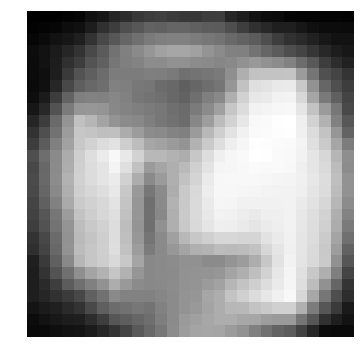

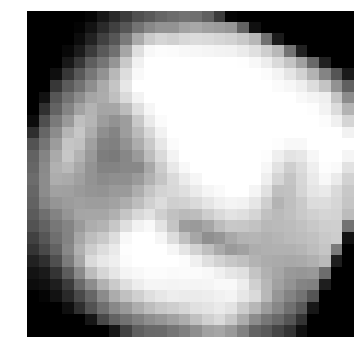

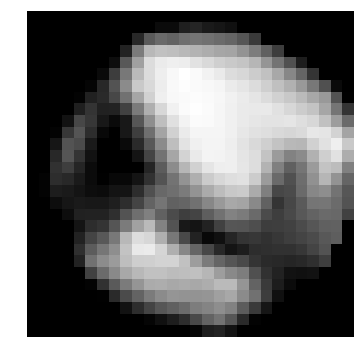

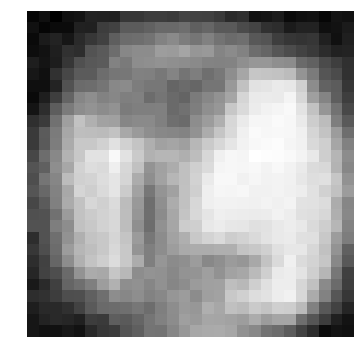

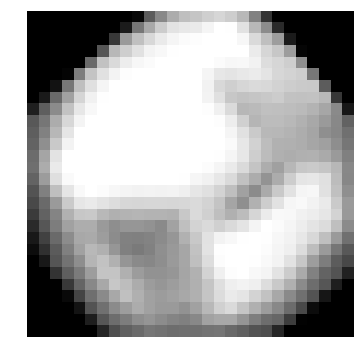

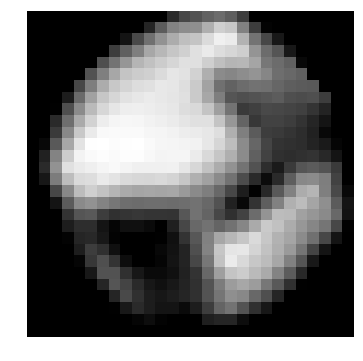

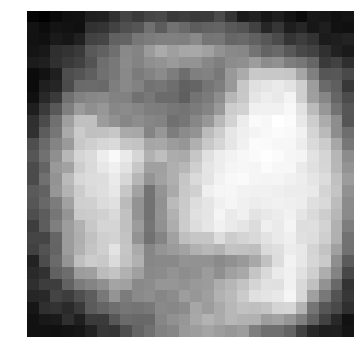

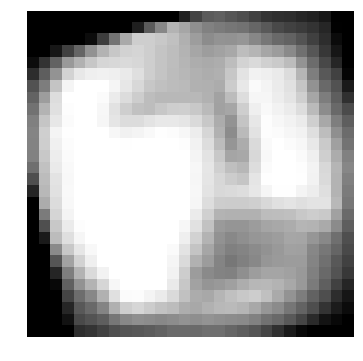

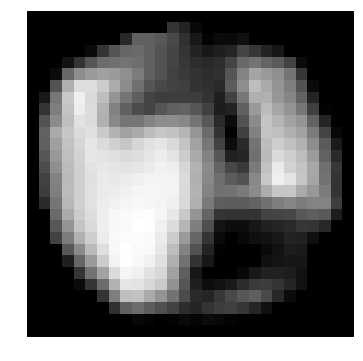

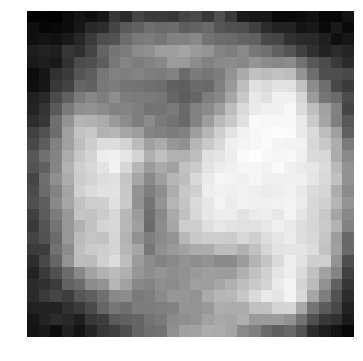

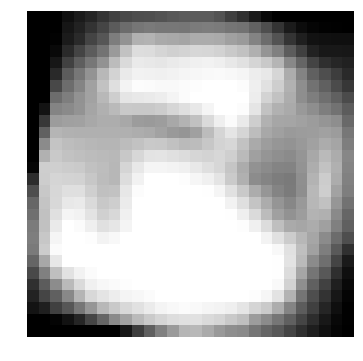

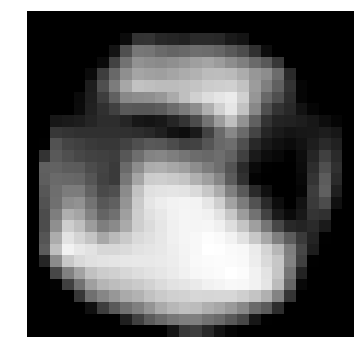

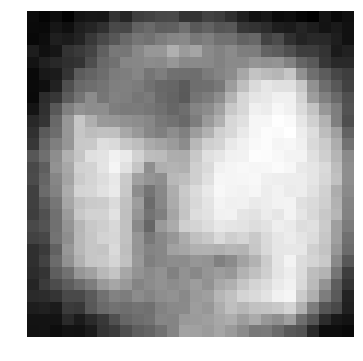

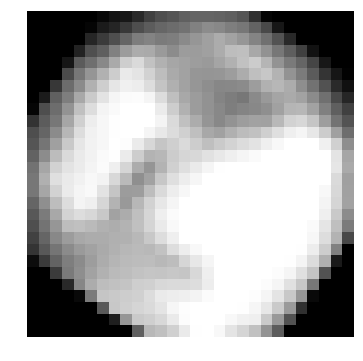

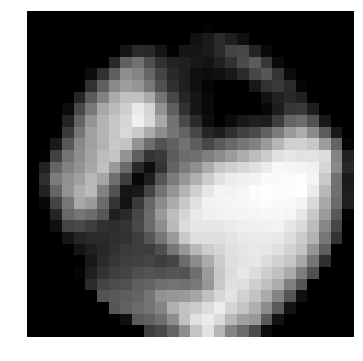

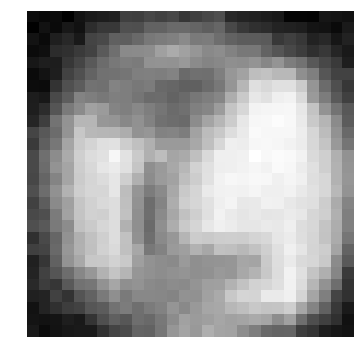

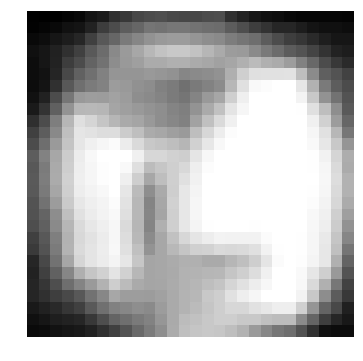

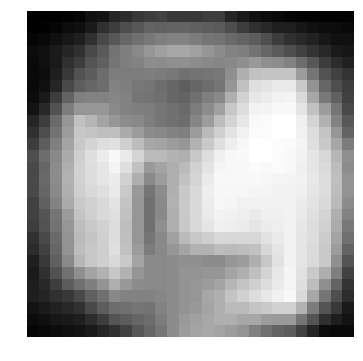

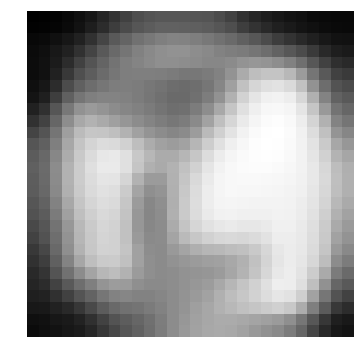

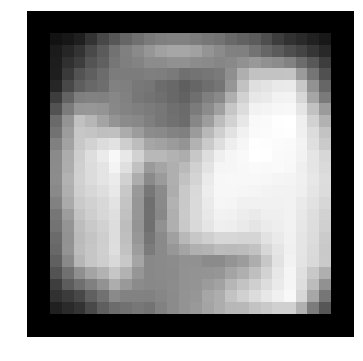

In [47]:
test_image = class_images_dict['2'][0]
gen_fun = gen_18_images
print(len(gen_fun(test_image)))
for im in gen_fun(test_image):
    view(im)

In [48]:
def augment_image_class(image_list_to_increase):
    num_images = len(image_list_to_increase)
    increase_images_func = None
    augmented_image_list = []
    
    if num_images > 45000:
        increase_images_func = gen_2_images
    elif num_images > 30000:
        increase_images_func = gen_3_images
    elif num_images > 20000:
        increase_images_func = gen_5_images
    elif num_images > 15000:
        increase_images_func = gen_7_images
    elif num_images > 10000:
        increase_images_func = gen_10_images
    else:
        #images < 10k
        increase_images_func = gen_18_images
        
    for image in image_list_to_increase:
        augmented_image_list.extend(increase_images_func(image))
        
    return augmented_image_list

def augent_images_to_increase(image_list_to_increase):
    augmented_image_list = []
    for image in image_list_to_increase:
        augmented_image_list.extend(gen_10_images(image))
    return augmented_image_list

In [49]:
X = []
image_class_names_index = 0
image_class_names = {}
y = []

for tag_class in class_images_dict.keys():
    image_class_names[image_class_names_index] = tag_class
    generated_images = augment_image_class(class_images_dict[tag_class])
    if tag_class in increase_class_images_dict.keys():
        generated_images.extend(augent_images_to_increase(increase_class_images_dict[tag_class]))
    X.extend(generated_images)
    y.extend([image_class_names_index] * len(generated_images))
    
    print(tag_class, len(generated_images), len([image_class_names_index] * len(generated_images)))
    
    image_class_names_index += 1
    
X = np.array(X)
y = np.array(y)

('CircleLine', 159601, 159601)
('Leaf', 191060, 191060)
('Note1', 201170, 201170)
('Unknown', 91330, 91330)
('DD', 137979, 137979)
('Peace', 136878, 136878)
('Question', 116350, 116350)
('Pillars', 146100, 146100)
('HH', 194940, 194940)
('Ampersand', 95358, 95358)
('PP', 155175, 155175)
('Hash', 218460, 218460)
('Power', 116554, 116554)
('Ankh', 123475, 123475)
('TT', 108040, 108040)
('Trident', 141649, 141649)
('Asterisk', 135260, 135260)
('4', 159470, 159470)
('Lines3', 140340, 140340)
('1', 136770, 136770)
('0', 114616, 114616)
('3', 121376, 121376)
('Plane', 130470, 130470)
('5', 154658, 154658)
('CircleHalf', 110175, 110175)
('7', 139835, 139835)
('Sun', 176560, 176560)
('8', 98394, 98394)
('Omega', 120701, 120701)
('ArrowHollow', 120170, 120170)
('AA', 138280, 138280)
('Note2', 107630, 107630)
('Radioactive', 129814, 129814)
('EE', 164630, 164630)
('UU', 141530, 141530)
('6', 166738, 166738)
('Plant', 152980, 152980)
('GG', 124610, 124610)
('XX', 109694, 109694)
('ZZ', 131494, 13

In [50]:
print(X.shape, y.shape)
print(set(y))
print(image_class_names[1])

((8418372, 28, 28), (8418372,))
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])
Leaf


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0, random_state=4)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((8418372, 28, 28), (8418372,), (0, 28, 28), (0,))


In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [53]:
Y_train = np_utils.to_categorical(y_train, len(set(y_train)))
Y_test = np_utils.to_categorical(y_test, len(set(y_train)))

In [54]:
img_rows = 28
img_cols = 28

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train.shape

(8418372, 28, 28, 1)

In [55]:
del class_images_dict
del increase_class_images_dict
del X
del y

In [56]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [59]:
model = Sequential()
# input layer
#model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28))) # if theano backend
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(60, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
8418372/8418372 [==============================] - 1041s - loss: 1.1023 - acc: 0.6831  
Epoch 2/10
8418372/8418372 [==============================] - 1056s - loss: 0.9293 - acc: 0.7350  
Epoch 3/10
8418372/8418372 [==============================] - 1060s - loss: 0.8999 - acc: 0.7441  
Epoch 4/10
8418372/8418372 [==============================] - 1072s - loss: 0.8867 - acc: 0.7483  
Epoch 5/10
8418372/8418372 [==============================] - 1044s - loss: 0.8809 - acc: 0.7501  
Epoch 6/10
8418372/8418372 [==============================] - 1034s - loss: 0.8796 - acc: 0.7511  
Epoch 7/10
7695200/8418372 [==========================>...] - ETA: 88s - loss: 0.8779 - acc: 0.7517

In [20]:
model.save('model.h5')

In [21]:
print(image_class_names)

{0: 'CircleLine', 1: 'heart', 2: 'Note1', 3: 'DD', 4: 'Peace', 5: 'Question', 6: 'Pillars', 7: 'HH', 8: 'Ampersand', 9: 'radioactive', 10: 'PP', 11: 'Umbrella', 12: 'RR', 13: 'Ankh', 14: 'sun', 15: 'TT', 16: 'Trident', 17: 'Asterisk', 18: '4', 19: '1', 20: '0', 21: '3', 22: 'Plane', 23: '5', 24: 'arrowhollow', 25: '7', 26: '6', 27: '8', 28: 'Omega', 29: 'CircleCross', 30: 'AA', 31: 'SS', 32: 'Note2', 33: 'hash', 34: 'EE', 35: 'UU', 36: 'Plant', 37: 'lines3', 38: 'nn', 39: 'GG', 40: 'necklace', 41: 'XX', 42: 'ZZ', 43: 'Triangle', 44: 'Dot', 45: 'a', 46: 'e', 47: 'Power', 48: 'KK', 49: 'h', 50: 'Queen', 51: 'Tadpole', 52: 'MM', 53: '2', 54: 'r', 55: 'ArrowLine', 56: 'circlehalf', 57: 'w', 58: 'unknown', 59: 'y', 60: 'Scissors', 61: 'leaf'}


In [22]:
pc = model.predict_classes(X_test)
pc

309472/309861 [============================>.] - ETA: 0s

array([45, 19, 26, ..., 41, 14, 27])

In [23]:
score = model.evaluate(X_test, Y_test) #, verbose=0
score

309216/309861 [============================>.] - ETA: 0s

[0.38235073245208306, 0.9047411581321948]

In [23]:
pc

array([26, 52, 55, ..., 55, 23, 42])

In [25]:
Y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

'0'

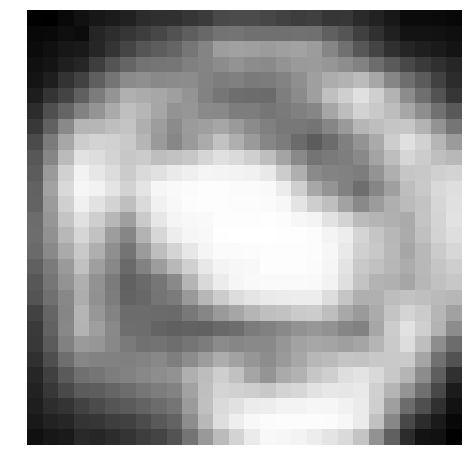

In [55]:
view(X_test[6].reshape(1, 28, 28)[0])
image_class_names[pc[6]]

In [56]:
image_class_names

{0: 'CircleLine',
 1: 'heart',
 2: 'Note1',
 3: 'DD',
 4: 'Note2',
 5: 'EE',
 6: 'Pillars',
 7: 'HH',
 8: 'Ampersand',
 9: 'Plant',
 10: 'leaf',
 11: 'arrowhollow',
 12: 'nn',
 13: 'Ankh',
 14: 'sun',
 15: 'TT',
 16: 'Trident',
 17: 'Asterisk',
 18: 'UU',
 19: '1',
 20: '0',
 21: '3',
 22: '2',
 23: '5',
 24: '4',
 25: '7',
 26: '6',
 27: '8',
 28: 'Omega',
 29: 'CircleCross',
 30: 'AA',
 31: 'SS',
 32: 'Peace',
 33: 'hash',
 34: 'Tadpole',
 35: 'ArrowLine',
 36: 'Question',
 37: 'RR',
 38: 'PP',
 39: 'lines3',
 40: 'GG',
 41: 'y',
 42: 'XX',
 43: 'ZZ',
 44: 'radioactive',
 45: 'Triangle',
 46: 'Umbrella',
 47: 'Dot',
 48: 'a',
 49: 'e',
 50: 'Power',
 51: 'KK',
 52: 'h',
 53: 'Queen',
 54: 'Plane',
 55: 'MM',
 56: 'r',
 57: 'circlehalf',
 58: 'w',
 59: 'unknown',
 60: 'necklace',
 61: 'Scissors'}

In [20]:
from sklearn.metrics import confusion_matrix

In [69]:
cm = confusion_matrix(y_test, pc, labels=None, sample_weight=None)

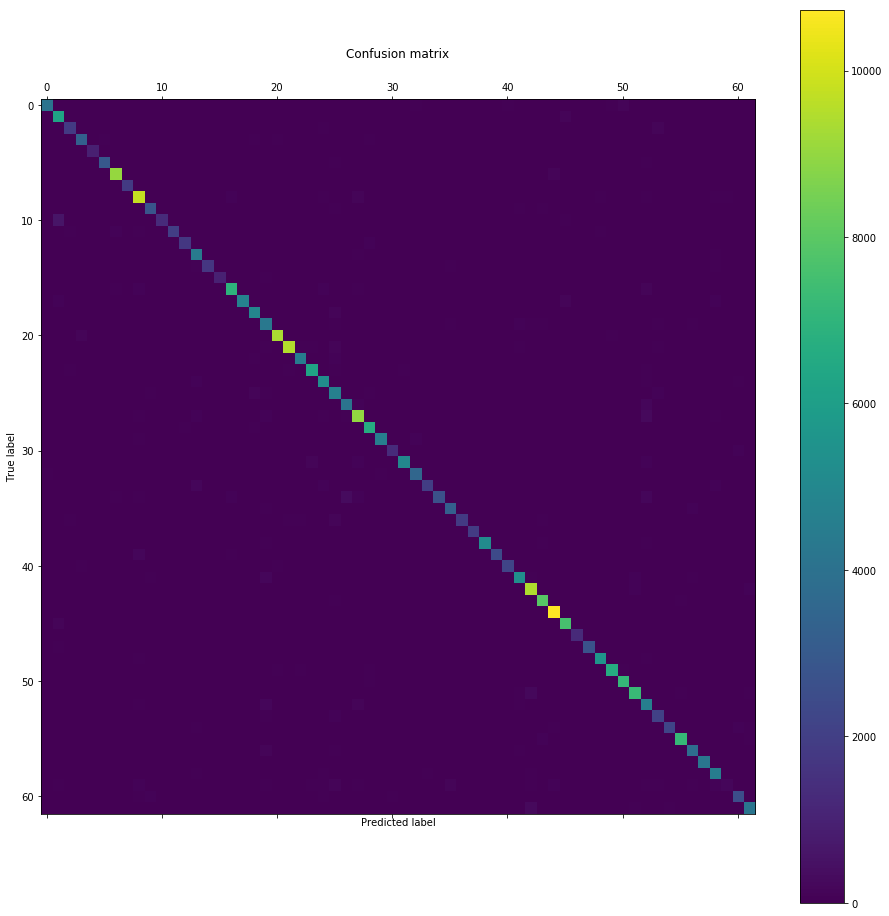

In [70]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()